
<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Three: Training Models </h2>	

In [ ]:
import os
from pathlib import Path
import seaborn as sns
import sklearn
from sklearn import model_selection
from sklearn import linear_model as lm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.ensemble as ens
from sklearn.model_selection import GridSearchCV,StratifiedShuffleSplit
import warnings
warnings.filterwarnings('ignore')

categories = ['airplanes', 'bear', 'blimp', 'comet', 'crab', 'dog', 'dolphin', 'giraffe', 'goat', 'gorilla', 'kangaroo', 'killer-whale', 'leopards', 'llama', 'penguin', 'porcupine', 'teddy-bear', 'triceratops', 'unicorn', 'zebra']

In [21]:
def train_test_split(df):
    df=model_selection.train_test_split(df, test_size=0.2, random_state=314)
    return df
#Split the data into a training set, and test set 

def accuracy(pred, actual):
    return (np.array(pred)==np.array(actual)).mean()
# Calculate the accuracy percentage of the predicted values

def normalize(df):
    return (df-df.mean())/df.std() ## important to normalize our features; we use mean=0, var=1

def accuracies(predictions,y_true): ### returns accuracies in the different categories
    return [(predictions[y_true == i] == i).mean() for i in range(20)]
        

folder_names_list = ['airplanes', 'bear', 'blimp', 'comet', 'crab', 'dog', 'dolphin', 'giraffe', 'goat', 'gorilla', 'kangaroo', 'killer-whale', 'leopards', 'llama', 'penguin', 'porcupine', 'teddy-bear', 'triceratops', 'unicorn', 'zebra']
encoding_list = range(20)
encoding = dict(zip(folder_names_list, encoding_list))
names = dict([[v,k] for k,v in encoding.items()])

In [22]:
### load the feature frames
#data_file = Path('/Users/will/Documents/Berkeley/Classes/DS100/Projects/GradProject', "features.hdf") # Path of hdf file
data_file = Path('C:/Users/Illan/Desktop/DS100/GradProjectFiles', "features.hdf") # Path of hdf file
df = pd.read_hdf(data_file,"features")
df_gray = pd.read_hdf(data_file,"features_gray")

In [23]:
### Create the train-test split, evenly across all categories

X = df.iloc[:,1:]
y = df.iloc[:,0]
train = pd.DataFrame(columns=df.columns)
val = pd.DataFrame(columns=df.columns)

for encoding in df.Encoding.unique():
    [train_temp,val_temp]=train_test_split(df.loc[y==encoding])
    train = train.append(train_temp)
    val = val.append(val_temp)
    
X_train, y_train = train.iloc[:,1:],train.iloc[:,0]
X_val, y_val = val.iloc[:,1:],val.iloc[:,0]

X_train_norm,X_val_norm = normalize(X_train), normalize(X_val)
y_train = y_train.astype('int')
y_val = y_val.astype('int')

In [24]:
### Same for the gray data frame

X_gray = df_gray.iloc[:,1:]
y_gray = df_gray.iloc[:,0]
train_gray = pd.DataFrame(columns=df_gray.columns)
val_gray = pd.DataFrame(columns=df_gray.columns)

for encoding in df_gray.Encoding.unique():
    [train_temp_gray,val_temp_gray]=train_test_split(df_gray.loc[y_gray==encoding])
    train_gray = train_gray.append(train_temp_gray)
    val_gray = val_gray.append(val_temp_gray)
    
X_train_gray, y_train_gray = train_gray.iloc[:,1:],train_gray.iloc[:,0]
X_val_gray, y_val_gray = val_gray.iloc[:,1:],val_gray.iloc[:,0]

X_train_norm_gray,X_val_norm_gray = normalize(X_train_gray), normalize(X_val_gray)
y_train_gray = y_train_gray.astype('int')
y_val_gray = y_val_gray.astype('int')

C:\Users\Illan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


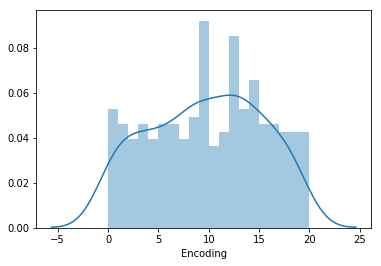

In [25]:
### Creates a histogram of the distribution of labels in the validation set
sns.distplot(y_val,bins=range(21))
plt.show()

<h3>  Train models using all of the following methods below. Be sure to drop the actual image column, and the encoding</h3>	Take note of the differences in accuracy, and methods.


<h4> Logistic Regression </h4>

In [26]:
### un-normalized data

logreg_model=lm.LogisticRegressionCV()
logreg_model.fit(X_train,y_train)
log_val_acc = accuracy(logreg_model.predict(X_val),y_val)
log_train_acc = accuracy(logreg_model.predict(X_train),y_train)
print("validation accuracy: ",log_val_acc)
print("train accuracy: ",log_train_acc)

validation accuracy:  0.22039473684210525
train accuracy:  0.2447078746824725


In [27]:
### normalized data

logreg_model=lm.LogisticRegressionCV()
logreg_model.fit(X_train_norm,y_train)
log_val_acc = accuracy(logreg_model.predict(X_val_norm),y_val)
log_train_acc = accuracy(logreg_model.predict(X_train_norm),y_train)
print("validation accuracy: ",log_val_acc)
print("train accuracy: ",log_train_acc)

validation accuracy:  0.20723684210526316
train accuracy:  0.32345469940728194


C:\Users\Illan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


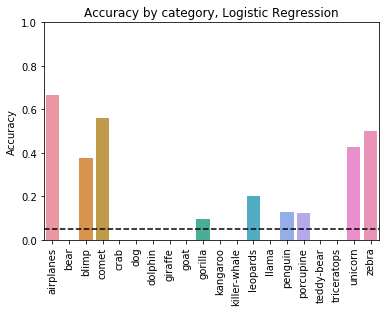

In [28]:
### Plots the accuracy of the model by category
logreg_eval=sklearn.metrics.precision_recall_fscore_support(y_val,logreg_model.predict(X_val_norm),labels=range(20))
plot=sns.barplot(x= categories,y=logreg_eval[0])
plt.ylim([0,1])
plt.ylabel('Accuracy')
plt.title('Accuracy by category, Logistic Regression')
plot.axhline(y=0.05,color='k',linestyle='--')
plot.set_xticklabels(plot.get_xticklabels(),rotation=90);
plt.savefig('logreg.png',bbox_inches='tight')
plt.show()

<h4> K-nearest Neighbors </h4>

In [29]:
### normalized data - default parameters

KN_model=sklearn.neighbors.KNeighborsClassifier()
KN_model.fit(X_train_norm,y_train)
KN_val_acc = accuracy(KN_model.predict(X_val_norm),y_val)
KN_train_acc = accuracy(KN_model.predict(X_train_norm),y_train)
print("validation accuracy: ",KN_val_acc)
print("train accuracy: ",KN_train_acc)

validation accuracy:  0.3059210526315789
train accuracy:  0.502116850127011


In [30]:
### Performs a search for optimal parameter values

parameters = {'n_neighbors': [5,10,15,20,50],'weights': ['uniform','distance'],'p': [1,2,3]}
KN_grid = GridSearchCV(KN_model, parameters, cv = 5)
KN_grid.fit(X_train_norm,y_train)

KN_results_df = pd.DataFrame(KN_grid.cv_results_)
#print(KN_grid)
print(KN_grid.best_score_)
print(KN_grid.best_params_)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [5, 10, 15, 20, 50], 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.34631668077900085
{'n_neighbors': 20, 'p': 1, 'weights': 'distance'}


C:\Users\Illan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Illan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Illan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Illan\Anaconda3\lib\site-packages\sklearn\util

In [31]:
### Trains and tests (on the validation set) our model for the optimal choice of parameter found above

KN_model=sklearn.neighbors.KNeighborsClassifier(**KN_grid.best_params_)
KN_model.fit(X_train_norm,y_train)
KN_val_acc = accuracy(KN_model.predict(X_val_norm),y_val)
KN_train_acc = accuracy(KN_model.predict(X_train_norm),y_train)
print("validation accuracy: ",KN_val_acc)
print("train accuracy: ",KN_train_acc)

validation accuracy:  0.3651315789473684
train accuracy:  1.0


C:\Users\Illan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


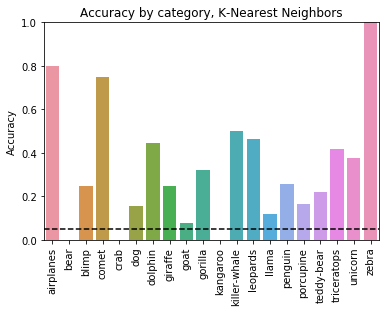

In [33]:
### Plots the accuracy of the model by category

KN_eval=sklearn.metrics.precision_recall_fscore_support(y_val,KN_model.predict(X_val_norm),labels=range(20))
plot=sns.barplot(x= categories,y=KN_eval[0])
plt.ylim([0,1])
plt.ylabel('Accuracy')
plt.title('Accuracy by category, K-Nearest Neighbors')
plot.axhline(y=0.05,color='k',linestyle='--')
plot.set_xticklabels(plot.get_xticklabels(),rotation=90);
plt.savefig('KN.png',bbox_inches='tight')
plt.show()

<h4> Random Forest (RF) </h4>

In [34]:
### un-normalized data - default parameters

RF_model=ens.RandomForestClassifier(random_state=42)
RF_model.fit(X_train,y_train)
RF_val_acc = accuracy(RF_model.predict(X_val),y_val)
RF_train_acc = accuracy(RF_model.predict(X_train),y_train)
print("validation accuracy: ",RF_val_acc)
print("train accuracy: ",RF_train_acc)

validation accuracy:  0.3618421052631579
train accuracy:  0.9991532599491956


In [35]:
### normalized data - default parameters

RF_model=ens.RandomForestClassifier(random_state=42)
RF_model.fit(X_train_norm,y_train)
RF_val_acc = accuracy(RF_model.predict(X_val_norm),y_val)
RF_train_acc = accuracy(RF_model.predict(X_train_norm),y_train)
print("validation accuracy: ",RF_val_acc)
print("train accuracy: ",RF_train_acc)

validation accuracy:  0.3125
train accuracy:  0.9991532599491956


In [ ]:
### Performs a search for optimal parameter values

parameters = { 'max_features':np.arange(5,10),'n_estimators':[200, 400, 600, 800, 1000],'min_samples_leaf': [10,50]}
random_grid = GridSearchCV(RF_model, parameters, cv = 5)
random_grid.fit(X_train,y_train)

random_results_df = pd.DataFrame(random_grid.cv_results_)
#print(random_grid)
print(random_grid.best_score_)
print(random_grid.best_params_)

In [ ]:
### Trains and tests (on the validation set) our model for the optimal choice of parameter found above

RF_model=ens.RandomForestClassifier(random_state=42,**random_grid.best_params_)
RF_model.fit(X_train,y_train)
RF_val_acc = accuracy(RF_model.predict(X_val),y_val)
RF_train_acc = accuracy(RF_model.predict(X_train),y_train)
print("validation accuracy: ",RF_val_acc)
print("train accuracy: ",RF_train_acc)

In [ ]:
### Plots the accuracy of the model by category

RF_eval=sklearn.metrics.precision_recall_fscore_support(y_val,RF_model.predict(X_val),labels=range(20))
plot=sns.barplot(x= categories,y=RF_eval[0])
plt.ylim([0,1])
plt.ylabel('Accuracy')
plt.title('Accuracy by category, Random Forest')
plot.axhline(y=0.05,color='k',linestyle='--')
plot.set_xticklabels(plot.get_xticklabels(),rotation=90);
plt.savefig('RF.png',bbox_inches='tight')
plt.show()

<h4> Support Vector Machine (SVM) </h4>

In [ ]:
### always normalize for SVM since it's using Euclidean distance

SVM_model=sklearn.svm.SVC(probability=True)
SVM_model.fit(X_train_norm,y_train)
SVM_val_acc = accuracy(SVM_model.predict(X_val_norm),y_val)
SVM_train_acc = accuracy(SVM_model.predict(X_train_norm),y_train)
print("validation accuracy: ",SVM_val_acc)
print("train accuracy: ",SVM_train_acc)

In [ ]:
### Performs a search for optimal parameter values

parameters = {'C':[0.001, 0.01, 0.1, 1, 10,50,100,1000],'gamma':[0.0001,0.001, 0.01, 0.1, 1]}
SVM_grid = GridSearchCV(SVM_model, parameters, cv = 5)
SVM_grid.fit(X_train_norm,y_train)

SVM_results_df = pd.DataFrame(SVM_grid.cv_results_)
#print(SVM_grid)
print(SVM_grid.best_score_)
print(SVM_grid.best_params_)

In [ ]:
### Trains and tests (on the validation set) our model for the optimal choice of parameter found above

SVM_model=sklearn.svm.SVC(probability=True,**SVM_grid.best_params_)
SVM_model.fit(X_train_norm,y_train)
SVM_val_acc = accuracy(SVM_model.predict(X_val_norm),y_val)
SVM_train_acc = accuracy(SVM_model.predict(X_train_norm),y_train)
print("validation accuracy: ",SVM_val_acc)
print("train accuracy: ",SVM_train_acc)

In [ ]:
### Plots the accuracy of the model by category

SVM_eval=sklearn.metrics.precision_recall_fscore_support(y_val,SVM_model.predict(X_val_norm),labels=range(20))
plot=sns.barplot(x= categories,y=SVM_eval[0])
plt.ylim([0,1])
plt.ylabel('Accuracy')
plt.title('Accuracy by category, Support Vector Machine')
plot.axhline(y=0.05,color='k',linestyle='--')
plot.set_xticklabels(plot.get_xticklabels(),rotation=90);
plt.savefig('SVM.png',bbox_inches='tight')
plt.show()

<h4> Blending the models? </h4>

In [ ]:
KN_probs = KN_model.predict_proba(X_val_norm)
RF_probs = RF_model.predict_proba(X_val)
SVM_probs = SVM_model.predict_proba(X_val_norm)
logreg_probs = logreg_model.predict_proba(X_val_norm)

a,b,c,d = 1,1,1,1 ## weights of KN, RF, SVM, logreg
blend_val_acc = np.zeros((10,10,10,10))
for a in range(10):
    for b in range(10):
        for c in range(10):
            for d in range(10):
                avg_probs = (a*KN_probs + b*RF_probs + c*SVM_probs + d*logreg_probs) # no need to sum to 1
                avg_predictions = np.argmax(avg_probs,axis=1)
                blend_val_acc[a,b,c,d] = accuracy(avg_predictions,y_val)
a_best,b_best,c_best,d_best = np.unravel_index(np.argmax(blend_val_acc), (10,10,10,10))
print("best validation accuracy:",np.max(blend_val_acc))
print("best weights: a,b,c,d =",(a_best,b_best,c_best,d_best))

### Note from GSI - we are not allowed to mix the models. :(

In [ ]:
### Weight the models by their accuracies in each category

weighted_RF = RF_model.predict_proba(X_val) * accuracies(RF_model.predict(X_val),y_val)
weighted_KN = KN_model.predict_proba(X_val_norm) * accuracies(KN_model.predict(X_val_norm),y_val)
weighted_SVM = SVM_model.predict_proba(X_val_norm) * accuracies(SVM_model.predict(X_val_norm),y_val)
weighted_logreg = logreg_model.predict_proba(X_val_norm) * accuracies(logreg_model.predict(X_val_norm),y_val)
predictions = np.argmax(weighted_RF + weighted_KN + weighted_SVM + weighted_logreg,axis=1)
print(accuracy(predictions,y_val))
print(accuracies(predictions,y_val))

In [ ]:
a,b,c,d = 1,1,1,1 ## weights of KN, RF, SVM, logreg
blend_val_acc = np.zeros((10,10,10,10))
for a in range(10):
    for b in range(10):
        for c in range(10):
            for d in range(10):
                avg_probs = (a*weighted_KN + b*weighted_RF + c*weighted_SVM + d*weighted_logreg) # no need to sum to 1
                avg_predictions = np.argmax(avg_probs,axis=1)
                blend_val_acc[a,b,c,d] = accuracy(avg_predictions,y_val)
a_best,b_best,c_best,d_best = np.unravel_index(np.argmax(blend_val_acc), (10,10,10,10))
print("best validation accuracy:",np.max(blend_val_acc))
print("best weights: a,b,c,d =",(a_best,b_best,c_best,d_best))

<h3> Predictions <h/3>

In [259]:
### load the feature frames
data_file = Path('/Users/will/Documents/Berkeley/Classes/DS100/Projects/GradProject', "test_features.hdf") # Path of hdf file
test_features_color = pd.read_hdf(data_file, "test_features_color")
test_features_gray = pd.read_hdf(data_file,"test_features_gray")

In [317]:
### SVM perfomed the best of all the models we considered, so here we use it as our final model to make our predictions.
final_model = sklearn.svm.SVC(probability=True,C=50,gamma=0.01)
final_model.fit(X_train_norm,y_train)

final_model_gray = sklearn.svm.SVC(probability=True,C=50,gamma=0.01)
final_model_gray.fit(X_train_norm_gray,y_train_gray)
# print(accuracy(final_model_gray.predict(normalize(X_val_gray)),y_val_gray)) ## diagnose gray validation accuracy -- returns 37%
acc_tot = (len(test_features_gray) / (len(test_features_color)+len(test_features_gray))) * accuracy(final_model_gray.predict(X_val_norm_gray),y_val_gray) + (len(test_features_color) / (len(test_features_color)+len(test_features_gray))) * accuracy(final_model.predict(X_val_norm),y_val)
print("total expected accuracy: ",acc_tot)

predictions_color = pd.DataFrame(final_model.predict(normalize(test_features_color)),index=test_features_color.index)
predictions_gray = pd.DataFrame(final_model_gray.predict(normalize(test_features_gray)),index=test_features_gray.index)

final_predictions = predictions_color.append(predictions_gray).sort_index()
final_predictions.to_csv('predictions.csv')

total expected accuracy:  0.400072490815
